In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
import pandas as pd
df = pd.read_csv(r"C:\Users\user\Desktop\sales.csv")
df

,socialMedia,Items,Deliverer,salary_more_then_100k
0,facebook,Printer,Amazon,0
1,facebook,Photocopy,Squad,0
2,facebook,Printer,Amazon,1
3,Twitter,Printer,Amazon,1
4,Twitter,Photocopy,Amazon,0
5,Twitter,Screen,Delirer,1
6,Twitter,Screen,Delirer,0
7,Instagram,Hardrive,Delirer,0
8,Instagram,Hardrive,Squad,0
9,Instagram,Hardrive,Squad,1


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(inputs,target,random_state =101,stratify =target,test_size =0.3)

In [138]:
df.isnull().sum()

socialMedia              0
Items                    0
Deliverer                0
salary_more_then_100k    0
dtype: int64

In [139]:
df["socialMedia"].unique()

array(['facebook', 'Twitter', 'Instagram', 'Linkedin'], dtype=object)

In [140]:
inputs = df.drop("salary_more_then_100k", axis= "columns")
inputs

,socialMedia,Items,Deliverer
0,facebook,Printer,Amazon
1,facebook,Photocopy,Squad
2,facebook,Printer,Amazon
3,Twitter,Printer,Amazon
4,Twitter,Photocopy,Amazon
5,Twitter,Screen,Delirer
6,Twitter,Screen,Delirer
7,Instagram,Hardrive,Delirer
8,Instagram,Hardrive,Squad
9,Instagram,Hardrive,Squad


In [141]:
target = df["salary_more_then_100k"]

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [144]:
le_socialMedia = LabelEncoder()
le_Items = LabelEncoder()
le_Deliverer = LabelEncoder()

In [145]:
inputs["socialMedia"] = le_socialMedia.fit_transform(inputs["socialMedia"])
inputs["Items"] = le_Items.fit_transform(inputs["Items"])
inputs["Deliverer"] = le_Items.fit_transform(inputs["Deliverer"])
inputs.head()

,socialMedia,Items,Deliverer
0,3,2,0
1,3,1,2
2,3,2,0
3,2,2,0
4,2,1,0


In [146]:
from  sklearn import tree
model = tree.DecisionTreeClassifier()

In [147]:
model.fit(inputs,target)
model.score(inputs,target)

0.75

In [148]:
model.predict([[3,2,0]])

array([0], dtype=int64)

In [149]:
from sklearn import metrics

In [150]:
inputs_arr = inputs.to_numpy()
inputs_arr

array([[3, 2, 0],
       [3, 1, 2],
       [3, 2, 0],
       [2, 2, 0],
       [2, 1, 0],
       [2, 3, 1],
       [2, 3, 1],
       [0, 0, 1],
       [0, 0, 2],
       [0, 0, 2],
       [0, 0, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 3, 0],
       [1, 3, 1],
       [1, 1, 2]])

In [151]:
target_arr = target.to_numpy()
target_arr

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [152]:
Output_pre = model.predict(inputs_arr)
Output_pre

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [153]:
expected = target_arr
predicted = Output_pre

model.predict(inputs,target)

In [154]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.60      0.75        10

    accuracy                           0.75        16
   macro avg       0.80      0.80      0.75        16
weighted avg       0.85      0.75      0.75        16



In [155]:
print(metrics.confusion_matrix(expected,predicted))

[[6 0]
 [4 6]]


In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
train_accuracy = []
validation_accuracy = []
for depth in range (1,10):
    model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    model.fit(inputs,target)
    train_accuracy.append(model.score(inputs,target))
    validation_accuracy.append(model.score(X_valid,y_valid))

In [158]:
frame = pd.DataFrame({"max_depth":range(1,10),"train_acc":train_accuracy,"valid_acc":validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.6875,1.0
1,2,0.7500,0.6
2,3,0.7500,0.8
3,4,0.7500,0.8
4,5,0.7500,0.8


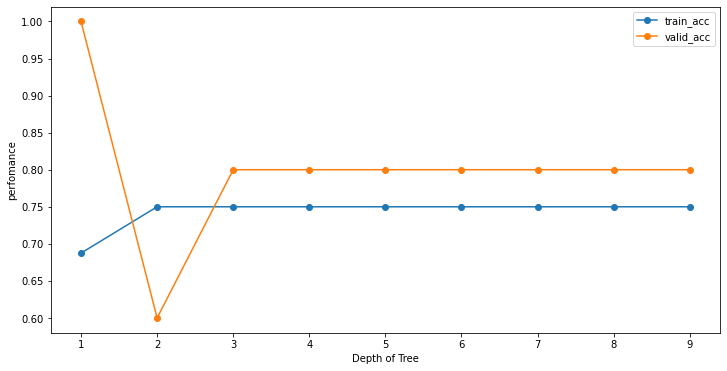

In [163]:
plt.figure(figsize = (12,6))
plt.plot(frame["max_depth"],frame["train_acc"], marker= "o")
plt.plot(frame["max_depth"],frame["valid_acc"], marker= "o")
plt.xlabel("Depth of Tree")
plt.ylabel("perfomance")
plt.legend(frame[["train_acc","valid_acc"]])